# Coordinate systems of ground truth and visual inertial odometry

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from scipy.spatial.transform import Rotation

In [2]:
data_name = "1"

### Read the sensor data

In [3]:
# Step 1: Read the file and organize data by sensor type
def read_sensor_file(file_path):
    # Dictionary to store data for each sensor type
    sensor_data = {}
    
    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            # Skip empty lines
            if not line.strip():
                continue
            
            # Split the line by semicolon
            parts = line.strip().split(';')
            
            # Get sensor type (first part of the line)
            sensor_type = parts[0]
            
            # Initialize list for this sensor type if not already in dictionary
            if sensor_type not in sensor_data:
                sensor_data[sensor_type] = []
            
            # Add the data (without the sensor type) to the list
            sensor_data[sensor_type].append(parts[1:])
    
    return sensor_data

# Step 2: Convert data to pandas DataFrames
def create_dataframes(sensor_data):
    # Dictionary to store dataframes
    dataframes = {}
    
    # Column names for each sensor type
    columns = {
        'ACCE': ['app_timestamp', 'sensor_timestamp', 'acc_x', 'acc_y', 'acc_z', 'accuracy'],
        'GYRO': ['app_timestamp', 'sensor_timestamp', 'gyr_x', 'gyr_y', 'gyr_z', 'accuracy'],
        'MAGN': ['app_timestamp', 'sensor_timestamp', 'mag_x', 'mag_y', 'mag_z', 'accuracy'],
        'AHRS': ['app_timestamp', 'sensor_timestamp', 'pitch_x', 'roll_y', 'yaw_z', 'quat_2', 'quat_3', 'quat_4', 'accuracy'],
        'UWBP': ['app_timestamp', 'sensor_timestamp', 'tag_id', 'distance', 'direction_vec_x', 'direction_vec_y', 'direction_vec_z'],
        'UWBT': ['app_timestamp', 'sensor_timestamp', 'tag_id', 'distance', 'aoa_azimuth', 'aoa_elevation', 'nlos'],
        'GPOS': ['app_timestamp', 'sensor_timestamp', 'object_id', 'location_x', 'location_y', 'location_z', 'quat_x', 'quat_y', 'quat_z'],
        'VISO': ['app_timestamp', 'sensor_timestamp', 'location_x', 'location_y', 'location_z', 'quat_x', 'quat_y', 'quat_z']
    }
    
    # Create a dataframe for each sensor type
    for sensor_type, data in sensor_data.items():
        if sensor_type in columns:
            # Create a dataframe with the appropriate column names
            df = pd.DataFrame(data, columns=columns[sensor_type])
            
            # Convert numeric columns from strings to floats
            for col in df.columns:
                if col not in ['tag_id', 'object_id']:  # Skip non-numeric columns
                    df[col] = pd.to_numeric(df[col], errors='coerce')
            
            # Use sensor_timestamp as the index
            df.set_index('sensor_timestamp', inplace=True)
            
            # Store the dataframe
            dataframes[sensor_type] = df
    
    return dataframes


# File path
file_path = f'./evaalapi_server/trials/{data_name}.txt'  # Update this path if your file is in a different location

# Step 1: Read the file
print("Reading sensor data file...")
sensor_data = read_sensor_file(file_path)

# Step 2: Create dataframes
print("Creating dataframes...")
dataframes = create_dataframes(sensor_data)


Reading sensor data file...
Creating dataframes...


## Read gound truth data

In [4]:
def quaternion_to_yaw(qw, qx, qy, qz):
    return np.arctan2(2.0 * (qw * qz + qx * qy), 1.0 - 2.0 * (qy * qy + qz * qz))

traj_filename = f"ground_truth/{data_name}.csv"
df_gt = pd.read_csv(traj_filename, header=0).astype(float)

df_gt['yaw'] = quaternion_to_yaw(df_gt['qw'], df_gt['qx'], df_gt['qy'], df_gt['qz'])
display(df_gt)
print(df_gt)

,timestamp,x,y,z,qw,qx,qy,qz,yaw
0,0.000,41.908298,-10.167844,1.086074,0.620845,0.391461,0.451081,0.507776,1.492294
1,0.067,41.894479,-10.144016,1.089935,0.625199,0.377639,0.443265,0.519645,1.502880
2,0.167,41.894543,-10.146287,1.088108,0.621363,0.378608,0.448350,0.519179,1.511081
3,0.300,41.890515,-10.143397,1.097090,0.613394,0.384823,0.446430,0.525699,1.521588
4,0.434,41.891810,-10.136658,1.095929,0.617561,0.381556,0.446253,0.523347,1.516205
...,...,...,...,...,...,...,...,...,...
6268,826.925,41.449481,-10.043877,1.089705,0.722649,0.584273,-0.144962,-0.339689,-0.737259
6269,827.025,41.489190,-10.073789,1.080488,0.716057,0.602505,-0.099877,-0.338045,-0.677389
6270,827.092,41.423673,-9.999193,1.062517,0.720921,0.595851,-0.113906,-0.335052,-0.690174
6271,827.192,41.424420,-10.007831,1.068319,0.718073,0.599907,-0.118537,-0.332313,-0.689696


      timestamp          x          y         z        qw        qx        qy  \
0         0.000  41.908298 -10.167844  1.086074  0.620845  0.391461  0.451081   
1         0.067  41.894479 -10.144016  1.089935  0.625199  0.377639  0.443265   
2         0.167  41.894543 -10.146287  1.088108  0.621363  0.378608  0.448350   
3         0.300  41.890515 -10.143397  1.097090  0.613394  0.384823  0.446430   
4         0.434  41.891810 -10.136658  1.095929  0.617561  0.381556  0.446253   
...         ...        ...        ...       ...       ...       ...       ...   
6268    826.925  41.449481 -10.043877  1.089705  0.722649  0.584273 -0.144962   
6269    827.025  41.489190 -10.073789  1.080488  0.716057  0.602505 -0.099877   
6270    827.092  41.423673  -9.999193  1.062517  0.720921  0.595851 -0.113906   
6271    827.192  41.424420 -10.007831  1.068319  0.718073  0.599907 -0.118537   
6272    827.292  41.481061 -10.065237  1.078632  0.702547  0.621226 -0.100057   

            qz       yaw  


## 3D Visualization of ground truth

<IPython.core.display.Javascript object>


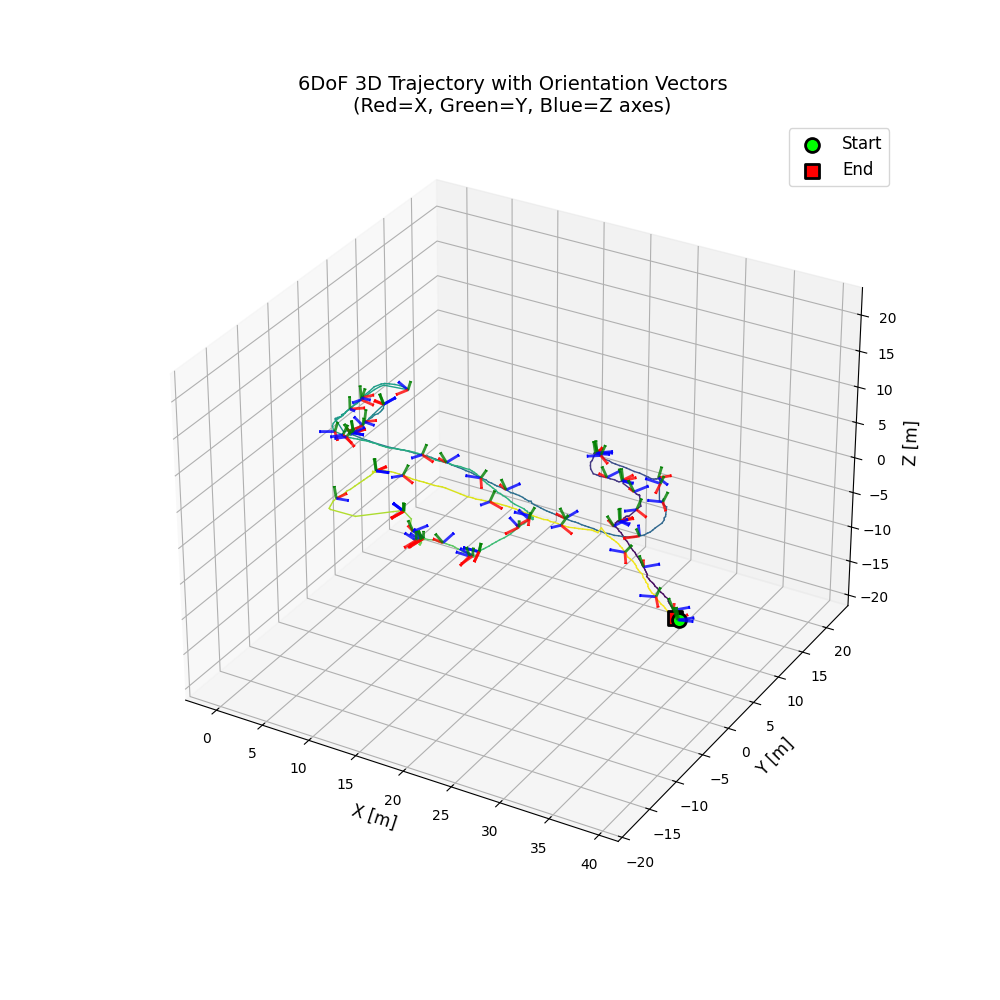

  Z: 0.676 to 1.630 m


In [ ]:
%matplotlib notebook


def quaternion_to_yaw(qw, qx, qy, qz):
    return np.arctan2(2.0 * (qw * qz + qx * qy), 1.0 - 2.0 * (qy * qy + qz * qz))

def quaternion_to_euler(qw, qx, qy, qz):
    """Convert quaternion to roll, pitch, yaw (in radians)"""
    r = Rotation.from_quat([qx, qy, qz, qw])
    return r.as_euler('xyz', degrees=False)

def quaternion_to_rotation_matrix(qw, qx, qy, qz):
    """Convert quaternion to rotation matrix"""
    r = Rotation.from_quat([qx, qy, qz, qw])
    return r.as_matrix()

def decimate_data(df, factor):
    """Decimate data by keeping every nth sample"""
    if factor <= 1:
        return df
    return df.iloc[::factor].copy().reset_index(drop=True)

def plot_detailed_3d_trajectory(df, decimation_factor=1, orientation_scale=0.3, orientation_step=20, figsize=(10, 10)):
    """Create a detailed 3D plot focusing on trajectory with orientation"""
    
    df_decimated = decimate_data(df, decimation_factor)
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot trajectory
    time_normalized = (df_decimated['timestamp'] - df_decimated['timestamp'].min()) / \
                     (df_decimated['timestamp'].max() - df_decimated['timestamp'].min())
    
    # Create segments for colored line
    points = np.array([df_decimated['x'].values, df_decimated['y'].values, df_decimated['z'].values]).T
    
    # Plot trajectory with color gradient
    for i in range(len(points)-1):
        color = plt.cm.viridis(time_normalized.iloc[i])
        ax.plot([points[i][0], points[i+1][0]], 
               [points[i][1], points[i+1][1]], 
               [points[i][2], points[i+1][2]], 
               color=color, linewidth=1)
    
    # Add orientation vectors
    orientation_step = max(1, orientation_step)
    
    for i in range(0, len(df_decimated), orientation_step):
        row = df_decimated.iloc[i]
        
        R = quaternion_to_rotation_matrix(row['qw'], row['qx'], row['qy'], row['qz'])
        
        x_axis = R[:, 0] * orientation_scale
        y_axis = R[:, 1] * orientation_scale
        z_axis = R[:, 2] * orientation_scale
        
        pos = np.array([row['x'], row['y'], row['z']])
        
        # Draw RGB orientation vectors
        ax.quiver(pos[0], pos[1], pos[2], x_axis[0], x_axis[1], x_axis[2], 
                 color='red', alpha=0.8, arrow_length_ratio=0.1, linewidth=2)
        ax.quiver(pos[0], pos[1], pos[2], y_axis[0], y_axis[1], y_axis[2], 
                 color='green', alpha=0.8, arrow_length_ratio=0.1, linewidth=2)
        ax.quiver(pos[0], pos[1], pos[2], z_axis[0], z_axis[1], z_axis[2], 
                 color='blue', alpha=0.8, arrow_length_ratio=0.1, linewidth=2)
    
    # Mark start and end
    ax.scatter(df_decimated['x'].iloc[0], df_decimated['y'].iloc[0], df_decimated['z'].iloc[0], 
              color='lime', s=100, marker='o', label='Start', edgecolor='black', linewidth=2)
    ax.scatter(df_decimated['x'].iloc[-1], df_decimated['y'].iloc[-1], df_decimated['z'].iloc[-1], 
              color='red', s=100, marker='s', label='End', edgecolor='black', linewidth=2)
    
    ax.set_xlabel('X [m]', fontsize=12)
    ax.set_ylabel('Y [m]', fontsize=12)
    ax.set_zlabel('Z [m]', fontsize=12)
    ax.set_title('6DoF 3D Trajectory with Orientation Vectors\n(Red=X, Green=Y, Blue=Z axes)', fontsize=14)
    ax.legend(fontsize=12)
    
    # Set equal aspect ratio
    max_range = np.array([df_decimated['x'].max()-df_decimated['x'].min(),
                         df_decimated['y'].max()-df_decimated['y'].min(),
                         df_decimated['z'].max()-df_decimated['z'].min()]).max() / 2.0
    
    mid_x = (df_decimated['x'].max()+df_decimated['x'].min()) * 0.5
    mid_y = (df_decimated['y'].max()+df_decimated['y'].min()) * 0.5
    mid_z = (df_decimated['z'].max()+df_decimated['z'].min()) * 0.5
    
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    return fig, df_decimated

fig2, _ = plot_detailed_3d_trajectory(df_gt, decimation_factor=5, orientation_scale=1.5)
plt.show()

print(f"Dataset info:")
print(f"Total samples: {len(df_gt)}")
print(f"Time range: {df_gt['timestamp'].min():.3f} - {df_gt['timestamp'].max():.3f} seconds")
print(f"Position range:")
print(f"  X: {df_gt['x'].min():.3f} to {df_gt['x'].max():.3f} m")
print(f"  Y: {df_gt['y'].min():.3f} to {df_gt['y'].max():.3f} m") 
print(f"  Z: {df_gt['z'].min():.3f} to {df_gt['z'].max():.3f} m")

## 3D Visualization of VISO

<IPython.core.display.Javascript object>


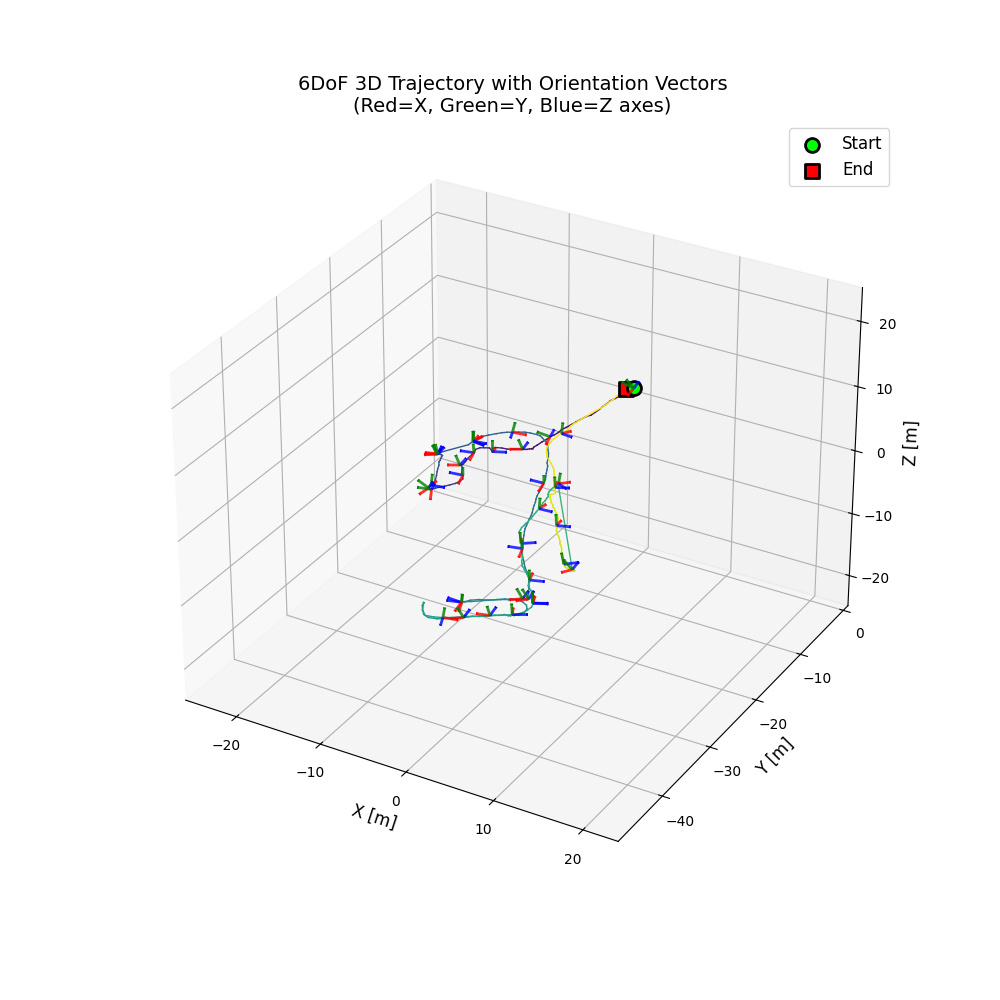

In [6]:
def recover_quat(quat_xyz_array):
    """
    Vectorized version of recover_quat that works on entire arrays
    quat_xyz_array: array of shape (N, 3) where N is number of quaternions
    """
    norm_xyz = np.sum(quat_xyz_array**2, axis=1)
    norm_xyz = np.minimum(norm_xyz, 1.0)
    
    quat_w = np.sqrt(1 - norm_xyz)
    quat_w[norm_xyz >= 1.0] = 0
    
    result = np.column_stack([quat_xyz_array, quat_w])
    return result


def prepare_data_for_plot(df):
    df_ret = df.rename(columns={"location_x": "x", 
                                 "location_y": "y", 
                                 "location_z": "z", 
                                 "quat_x": "qx", 
                                 "quat_y": "qy", 
                                 "quat_z": "qz"})
    df_ret["timestamp"] = df_ret.index.values
    recovered_quats = recover_quat(df_ret[['qx', 'qy', 'qz']].values)

    df_ret['qw'] = recovered_quats[:, 3]
    return df_ret


df_viso = prepare_data_for_plot(dataframes["VISO"])
fig2, _ = plot_detailed_3d_trajectory(df_viso, decimation_factor=20, orientation_scale=1.5)
plt.show()


## 3D Visualization of GPOS(base_link)

<IPython.core.display.Javascript object>


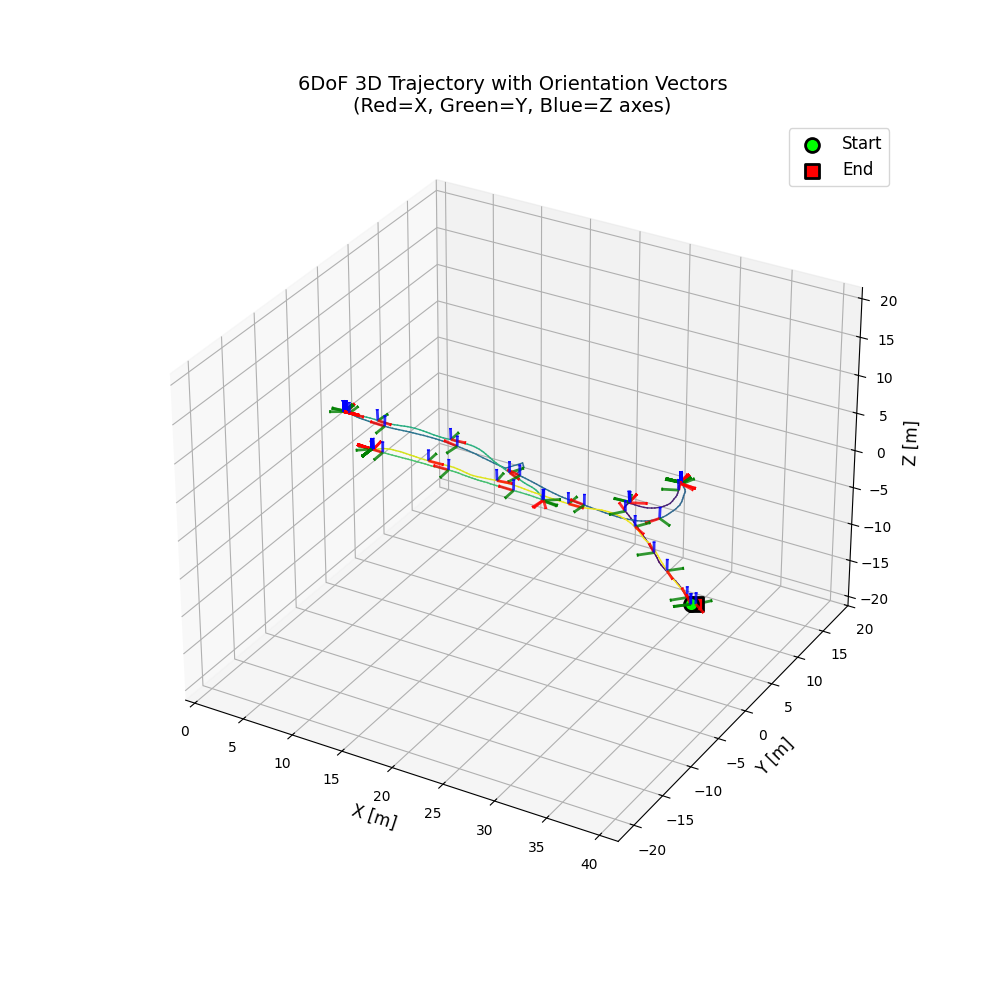

In [7]:
df_gpos_baselink = prepare_data_for_plot(dataframes["GPOS"][dataframes["GPOS"]["object_id"] == "base_link"])
fig3, _ = plot_detailed_3d_trajectory(df_gpos_baselink, decimation_factor=8, orientation_scale=1.5)
plt.show()

## 3D Visualization of GPOS(3583WAA)

<IPython.core.display.Javascript object>


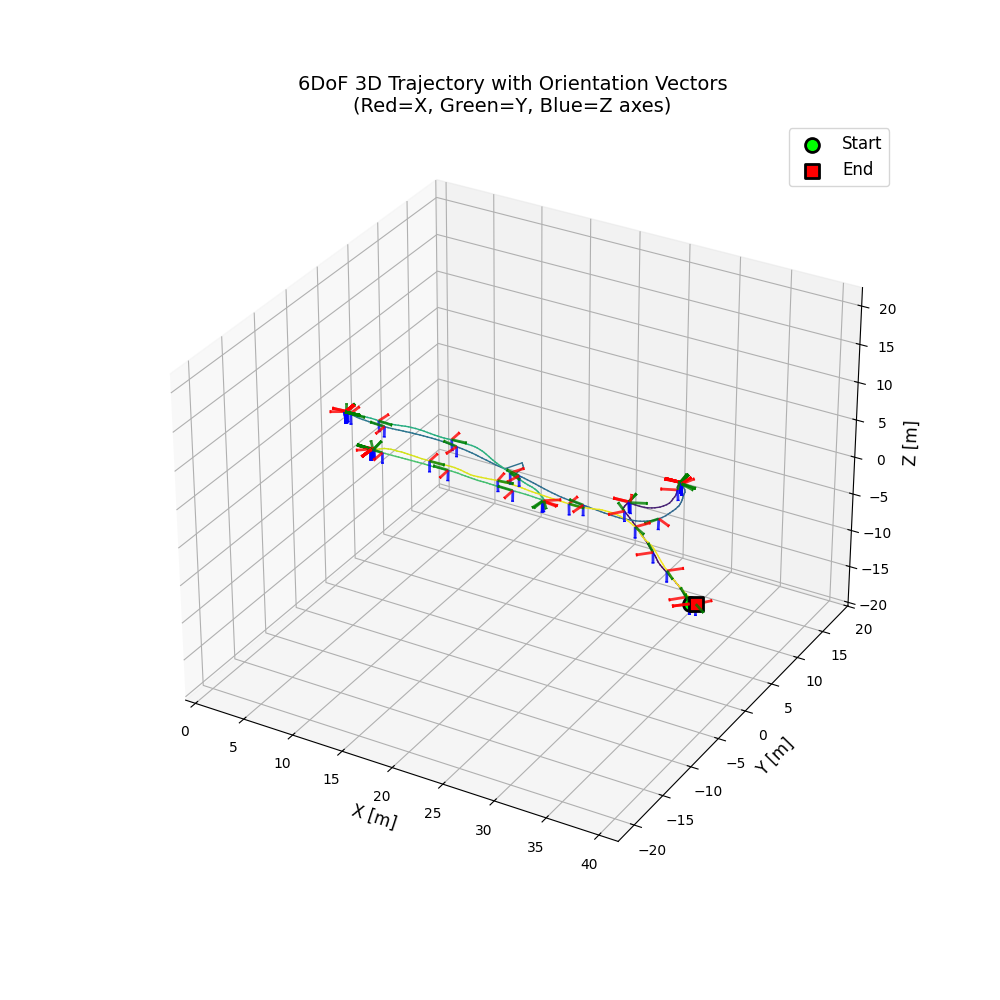

In [9]:
df_gpos_tag = prepare_data_for_plot(dataframes["GPOS"][dataframes["GPOS"]["object_id"] == "3583WAA"]) # tag on the handle of AI Suitcase
fig3, _ = plot_detailed_3d_trajectory(df_gpos_tag, decimation_factor=8, orientation_scale=1.5)
plt.show()